FONTES DE DATASETS:
https://repositorio.seade.gov.br/dataset/populacao-residente-estado-de-sao-paulo
https://www.kaggle.com/datasets/inquisitivecrow/crime-data-in-brazil

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urbanpy as up
import geopandas as gpd 
import contextily as ctx
from shapely.geometry import Point
import folium

In [5]:
#importando todos os csv's como dataframes para poder analisá-los sequencialmente e, em seguida, comparativamente no tempo.

lista_dfs = os.listdir("/home/thiago/datasets/Crime Data in Brazil")

dicio_dfs = {}

for file in lista_dfs:
    if not file == 'auxiliar':
        df = pd.read_csv("/home/thiago/datasets/Crime Data in Brazil/"+file)
        nome_file = 'df_' + file[:-4]
        dicio_dfs[nome_file] = df

KeyboardInterrupt: 

In [ ]:
df1 = dicio_dfs['df_BO_2007_1']

In [ ]:
df1.columns

Index(['NUM_BO', 'ANO_BO', 'ID_DELEGACIA', 'NOME_DEPARTAMENTO',
       'NOME_SECCIONAL', 'DELEGACIA', 'NOME_DEPARTAMENTO_CIRC',
       'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'ANO', 'MES',
       'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA_BO', 'FLAG_STATUS', 'RUBRICA',
       'DESDOBRAMENTO', 'CONDUTA', 'LATITUDE', 'LONGITUDE', 'CIDADE',
       'LOGRADOURO', 'NUMERO_LOGRADOURO', 'FLAG_STATUS.1', 'DESCR_TIPO_PESSOA',
       'CONT_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA', 'COR', 'DESCR_PROFISSAO',
       'DESCR_GRAU_INSTRUCAO'],
      dtype='object')

In [ ]:
df1.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,...,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,DESCR_TIPO_PESSOA,CONT_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
0,1,2007,10101,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,2007,...,AV DA LIBERDADE,1,C,Vítima,1.0,M,23.0,Branca,OPERADOR(A),2 Grau completo
1,1,2007,10112,DECAP,DEL.SEC.1º CENTRO,12º D.P. PARI,DECAP,DEL.SEC.1º CENTRO,12º D.P. PARI,2007,...,R JOAO TEODORO,1248,C,Indiciado,3.0,M,NaN,Branca,NaN,NaN
2,1,2007,10112,DECAP,DEL.SEC.1º CENTRO,12º D.P. PARI,DECAP,DEL.SEC.1º CENTRO,12º D.P. PARI,2007,...,R JOAO TEODORO,1248,C,Indiciado,4.0,M,NaN,Branca,NaN,NaN
3,1,2007,10112,DECAP,DEL.SEC.1º CENTRO,12º D.P. PARI,DECAP,DEL.SEC.1º CENTRO,12º D.P. PARI,2007,...,R JOAO TEODORO,1248,C,Indiciado,9.0,M,NaN,Branca,NaN,NaN
4,1,2007,10235,DECAP,DEL.SEC.2º SUL,35º D.P. JABAQUARA,DECAP,DEL.SEC.2º SUL,97º D.P. AMERICANOPOLIS,2007,...,AV ENG ARMANDO DE ARRUDA PEREIRA,5526,C,Indiciado,4.0,M,NaN,Branca,NaN,NaN


In [ ]:
dicionario_inc = {}
for i in range(len(df1)):
  cidade = df1['CIDADE'][i]
  if type(cidade) == str:
    cidade = cidade.strip()
#   print(cidade)
  # print(type(cidade))
  if cidade not in dicionario_inc.keys():
    dicionario_inc[cidade] = 1
  else:
    dicionario_inc[cidade] += 1

print(dicionario_inc)

{'S.PAULO': 463384, 'S.ANDRE': 25634, 'RIBEIRAO PIRES': 3546, 'GUARULHOS': 31756, 'GUARAREMA': 794, 'BARUERI': 8399, 'EMBU': 4593, 'JANDIRA': 2633, 'ITAQUAQUECETUBA': 5375, 'S.BERNARDO DO CAMPO': 25677, 'OSASCO': 21427, 'TABOAO DA SERRA': 7319, 'CARAPICUIBA': 9090, 'MAUA': 9474, 'DIADEMA': 12664, 'COTIA': 5855, 'MAIRIPORA': 3348, 'CAIEIRAS': 2137, 'CAJAMAR': 1381, 'ARUJA': 2225, 'BIRITIBA-MIRIM': 683, 'SUZANO': 6672, 'EMBU-GUACU': 1297, 'MOGI DAS CRUZES': 9522, 'S.CAETANO DO SUL': 6388, 'ITAPEVI': 4612, 'ITAPECERICA DA SERRA': 3609, 'S.ISABEL': 1798, 'VARGEM GRANDE PAULISTA': 781, 'S.LOURENCO DA SERRA': 383, 'FRANCO DA ROCHA': 3045, 'FRANCISCO MORATO': 2188, 'POA': 2838, 'SÃO PAULO': 25015, 'PIRAPORA BOM JESUS': 436, 'JUQUITIBA': 1141, 'RIO GRANDE DA SERRA': 712, 'SANTANA DE PARNAIBA': 2372, 'SALESOPOLIS': 299, 'FERRAZ DE VASCONCELOS': 3175, 'SANTANA DE PARNAÍBA': 12, 'SANTO ANDRÉ': 736, 'FERNANDO PRESTES': 4, 'SÃO BERNARDO DO CAMPO': 737, 'SAO PAULO': 1, 'TABOÃO DA SERRA': 73, 'PERUÍB

In [ ]:
df1['CIDADE'].unique()

# 'S.ANDRÉ' in dicionario_inc.keys()

array(['S.PAULO                                 ',
       'S.ANDRE                                 ',
       'RIBEIRAO PIRES                          ',
       'GUARULHOS                               ',
       'GUARAREMA                               ',
       'BARUERI                                 ',
       'EMBU                                    ',
       'JANDIRA                                 ',
       'ITAQUAQUECETUBA                         ',
       'S.BERNARDO DO CAMPO                     ',
       'OSASCO                                  ',
       'TABOAO DA SERRA                         ',
       'CARAPICUIBA                             ',
       'MAUA                                    ',
       'DIADEMA                                 ',
       'COTIA                                   ',
       'MAIRIPORA                               ',
       'CAIEIRAS                                ',
       'CAJAMAR                                 ',
       'ARUJA                  

NOMES PROBLEMATICOS: S.PAULO, S.ANDRE, S.BERNARDO DO CAMPO, S.CAETANO DO SUL, S.ISABEL, Osasco, S.LOURENCO DA SERRA

In [ ]:
#vamos resolver os nomes defectivos que são virtualmente cópias de outros nomes (S.PAULO e SÃO PAULO) e rodar um .strip() para tirar o excesso de caracteres ' ' ao fim das palavras.
def CorrigeNome(nome):
    if nome != 'S.ANDRE' or nome != 'S.ISABEL' or nome != 'Osasco':
        nome = nome.replace('S.', 'SAO ')
    nome = nome.replace('S.ANDRE', 'SANTO ANDRE')
    nome = nome.replace('S.ISABEL', 'SANTA ISABEL')
    nome = nome.replace('Osasco', 'OSASCO')
    nome = nome.replace('Á', 'A')
    nome = nome.replace('Â', 'A')
    nome = nome.replace('Ã', 'A')
    nome = nome.replace('É', 'E')
    nome = nome.replace('Ê', 'E')
    nome = nome.replace('Í', 'I')
    nome = nome.replace('Ó', 'O')
    nome = nome.replace('Ô', 'O')
    nome = nome.replace('Ú', 'U')
    nome = nome.replace('Ç', 'C')
    nome = nome.replace('-', ' ')

    nome = nome.strip()

    return nome

In [ ]:
#o loop vai servir para corrigirmos todos os df's de uma vez.
for df_name in dicio_dfs.keys():
    df = dicio_dfs[df_name]
    
    #percorremos o df na coluna 'CIDADE' fazendo a correção.
    for i in range(len(df)):
        cidade = df['CIDADE'][i]
        cidade = CorrigeNome(cidade)
        df['CIDADE'][i] = cidade

In [ ]:
sum = 0
for key in dicionario_inc.keys():
    if key != 'S.PAULO':
        sum += dicionario_inc[key]

print(sum)

262574


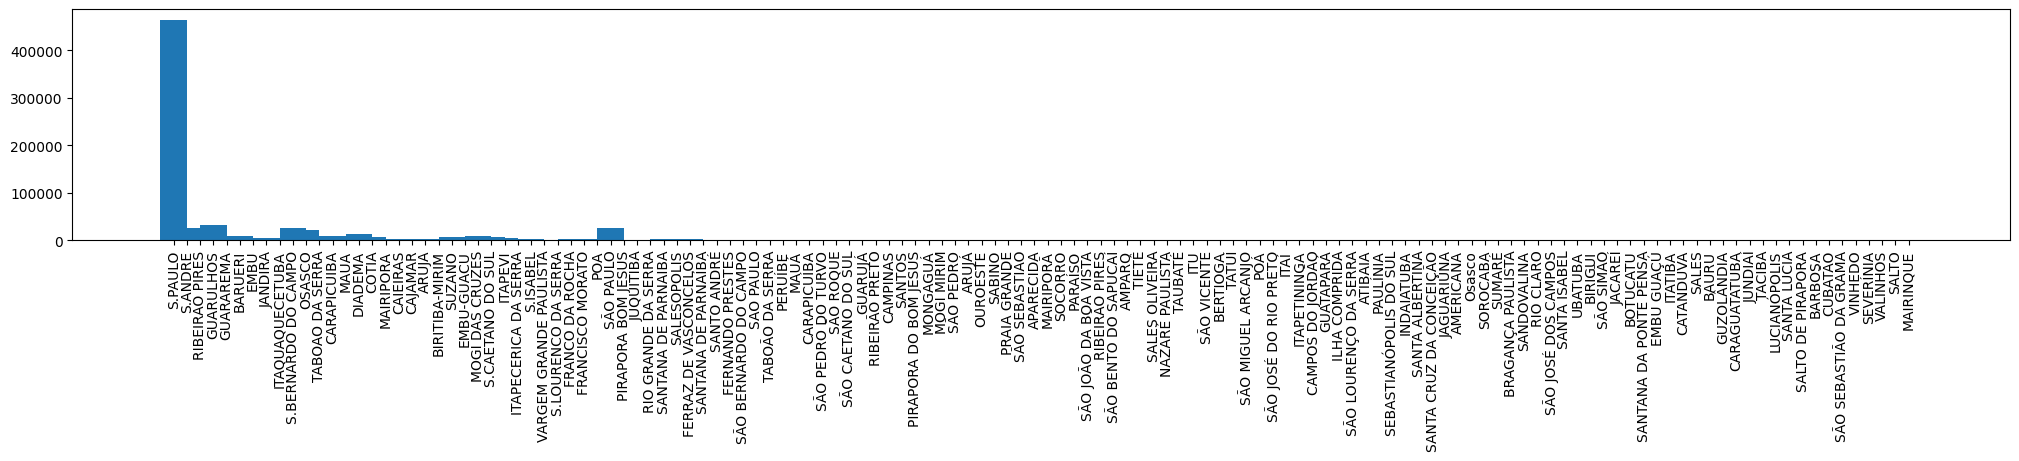

In [ ]:
plt.figure(figsize=(25, 3))
plt.bar(*zip(*dicionario_inc.items()), width=2)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df1['Points'].value_counts().plot(ax=ax, kind='bar')

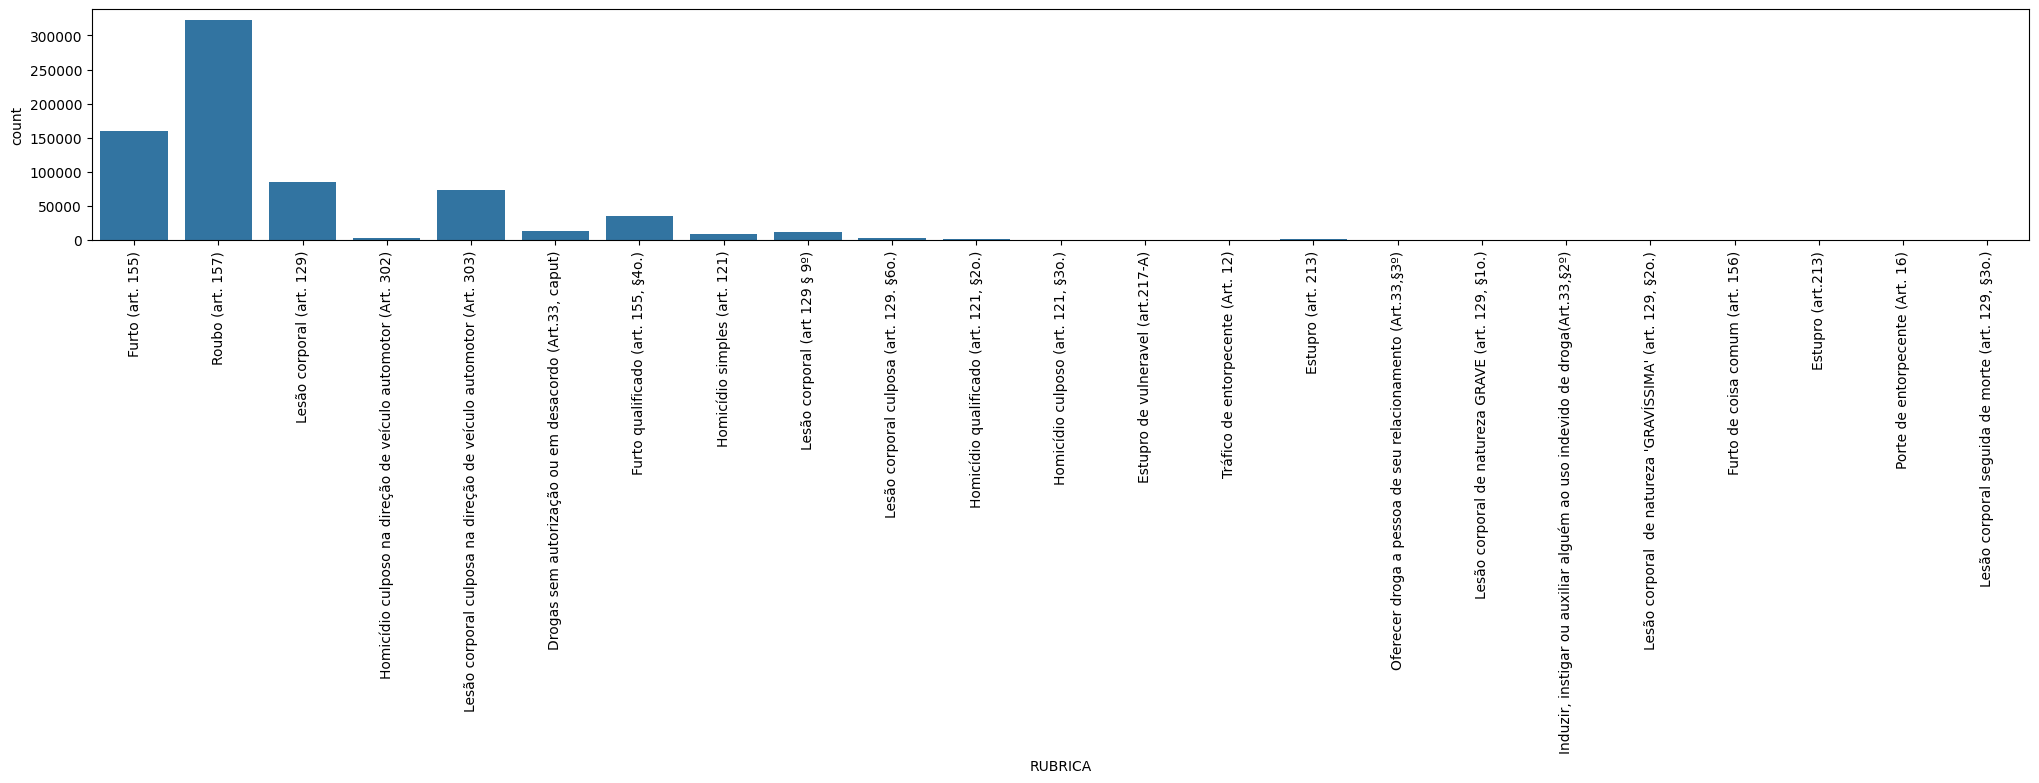

In [ ]:
plt.figure(figsize=(25, 3))
plt.xticks(rotation = 'vertical')
ax = sns.countplot(x="RUBRICA",data=df1)


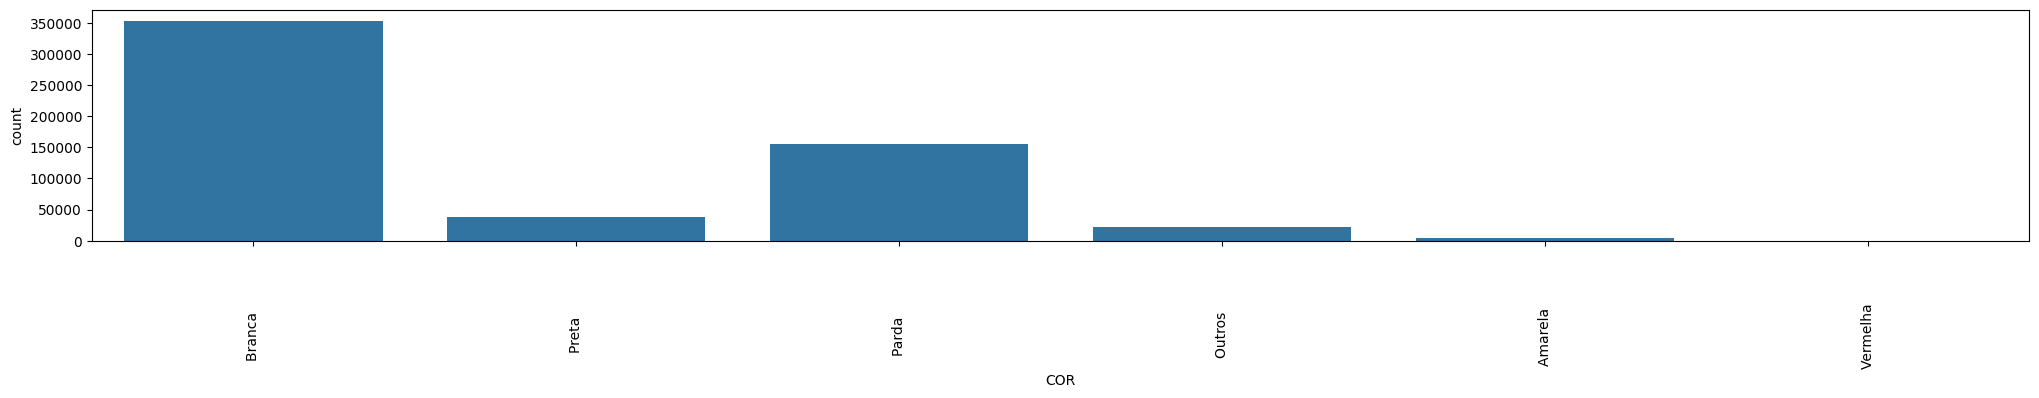

In [ ]:
plt.figure(figsize=(25, 3))
plt.xticks(rotation = 'vertical')
ax = sns.countplot(x="COR",data=df1)

In [ ]:
'RIBEIRÃO PIRES' in dicionario_inc.keys()

True

In [ ]:
valores_unicos = df1['DESCR_TIPO_PESSOA'].unique()
for i in range(len(valores_unicos)):
    value = valores_unicos[i]
    if type(value) == str: valores_unicos[i] = value.strip()
    
valores_unicos

array(['Vítima', 'Indiciado', 'Autor', 'Representante', 'Testemunha',
       'Condutor', 'Partes', 'Autor/Vitima', 'Averiguado',
       'Adolescente infrator', 'Adolescente', 'Declarante', 'Curador',
       'Criança', 'Advogado', nan, 'Desaparecido'], dtype=object)

In [ ]:
df1.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,...,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,DESCR_TIPO_PESSOA,CONT_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
0,1,2007,10101,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,2007,...,AV DA LIBERDADE,1,C,Vítima,1.0,M,23.0,Branca,OPERADOR(A),2 Grau completo
1,1,2007,10112,DECAP,DEL.SEC.1º CENTRO,12º D.P. PARI,DECAP,DEL.SEC.1º CENTRO,12º D.P. PARI,2007,...,R JOAO TEODORO,1248,C,Indiciado,3.0,M,NaN,Branca,NaN,NaN
2,1,2007,10112,DECAP,DEL.SEC.1º CENTRO,12º D.P. PARI,DECAP,DEL.SEC.1º CENTRO,12º D.P. PARI,2007,...,R JOAO TEODORO,1248,C,Indiciado,4.0,M,NaN,Branca,NaN,NaN
3,1,2007,10112,DECAP,DEL.SEC.1º CENTRO,12º D.P. PARI,DECAP,DEL.SEC.1º CENTRO,12º D.P. PARI,2007,...,R JOAO TEODORO,1248,C,Indiciado,9.0,M,NaN,Branca,NaN,NaN
4,1,2007,10235,DECAP,DEL.SEC.2º SUL,35º D.P. JABAQUARA,DECAP,DEL.SEC.2º SUL,97º D.P. AMERICANOPOLIS,2007,...,AV ENG ARMANDO DE ARRUDA PEREIRA,5526,C,Indiciado,4.0,M,NaN,Branca,NaN,NaN


In [ ]:
data = dicio_dfs['df_BO_2016']
data = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.LONGITUDE, data.LATITUDE))

In [ ]:
data

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,...,DESDOBRAMENTO,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,Unnamed: 21,geometry
0,3784,2016,10101,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,DECAP,DEL.SEC.1º CENTRO,78º D.P. JARDINS,2016,...,NaN,TRANSEUNTE,-23.564984,-46.652035,S.PAULO,AVENIDA PAULISTA,1000,C,NaN,POINT (-46.65203 -23.56498)
1,3426,2016,10102,DECAP,DEL.SEC.1º CENTRO,02º D.P. BOM RETIRO,DECAP,DEL.SEC.1º CENTRO,03º D.P. CAMPOS ELISEOS,2016,...,NaN,TRANSEUNTE,-23.542476,-46.641928,S.PAULO,PRAÇA DA REPUBLICA,0,C,NaN,POINT (-46.64193 -23.54248)
2,6359,2016,10102,DECAP,DEL.SEC.1º CENTRO,02º D.P. BOM RETIRO,DECAP,DEL.SEC.1º CENTRO,03º D.P. CAMPOS ELISEOS,2016,...,NaN,NaN,-23.542183,-46.640599,S.PAULO,RUA CONSELHEIRO NEBIAS,0,C,NaN,POINT (-46.64060 -23.54218)
3,1267,2016,10103,DECAP,DEL.SEC.1º CENTRO,03º D.P. CAMPOS ELISEOS,DECAP,DEL.SEC.8º SAO MATEUS,49º D.P. SAO MATEUS,2016,...,NaN,CARGA,-23.609275,-46.455087,S.PAULO,RUA MADUREIRA CALHEIROS,15,C,NaN,POINT (-46.45509 -23.60927)
4,4804,2016,10106,DECAP,DEL.SEC.1º CENTRO,06º D.P. CAMBUCI,DECAP,DEL.SEC.1º CENTRO,06º D.P. CAMBUCI,2016,...,NaN,NaN,-23.573928,-46.620693,S.PAULO,RUA ROBERTSON,625,C,NaN,POINT (-46.62069 -23.57393)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774657,8105,2016,10314,DECAP,DEL.SEC.3º OESTE,14º D.P. PINHEIROS,DECAP,DEL.SEC.3º OESTE,14º D.P. PINHEIROS,2016,...,NaN,INTERIOR DE VEICULO,-23.560675,-46.672173,S.PAULO,AVENIDA REBOUCAS,955.0,C,NaN,POINT (-46.67217 -23.56067)
774658,5789,2016,10356,DECAP,DEL.SEC.3º OESTE,89º D.P. JARDIM TABOAO,DECAP,DEL.SEC.3º OESTE,37º D.P. CAMPO LIMPO,2016,...,NaN,INTERIOR DE VEICULO,-23.632502,-46.738877,S.PAULO,RUA MARIA JOSE DA CONCEICAO,56.0,C,NaN,POINT (-46.73888 -23.63250)
774659,3093,2016,10248,DECAP,DEL.SEC.6º SANTO AMARO,48º D.P. CIDADE DUTRA,DECAP,DEL.SEC.2º SUL,27º D.P. IBIRAPUERA,2016,...,NaN,INTERIOR TRANSPORTE COLETIVO,-23.606811,-46.665355,S.PAULO,AVENIDA IBIRAPUERA,2500.0,C,NaN,POINT (-46.66536 -23.60681)
774660,1553,2016,10355,DECAP,DEL.SEC.7º ITAQUERA,67º D.P. JARDIM ROBRU,DECAP,DEL.SEC.7º ITAQUERA,67º D.P. JARDIM ROBRU,2016,...,NaN,TRANSEUNTE,-23.522110,-46.418549,S.PAULO,AVENIDA NORDESTINA,5000.0,C,NaN,POINT (-46.41855 -23.52211)


In [ ]:
# Exemplo de dados de crimes (substitua pelo seu dataset)
data = {
    'Latitude': [-23.5505, -23.5597, -23.5675],
    'Longitude': [-46.6333, -46.6252, -46.6341]
}

# Crie um DataFrame a partir dos dados
df = pd.DataFrame(data)

# Crie uma GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=[Point(xy) for xy in zip(df['Longitude'], df['Latitude'])])

# Centro do mapa (latitude e longitude aproximadas do estado de SP)
map_center = [-23.5505, -46.6333]

# Crie o mapa base com folium
m = folium.Map(location=map_center, zoom_start=10, tiles='Stadia.AlidadeSmooth')

# Adicione os pontos de crimes ao mapa
for idx, row in gdf.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=5,  # Tamanho do ponto
                        color='red',  # Cor do ponto
                        fill=True,
                        fill_color='red').add_to(m)

# Salve o mapa em um arquivo HTML
m.save("mapa_crimes_sp.html")

# Exibir o mapa no Jupyter Notebook (se estiver usando um)
m

In [39]:
data = pd.read_csv("/home/thiago/datasets/Crime Data in Brazil/BO_2016.csv")

/tmp/ipykernel_13460/3737005336.py:1: DtypeWarning: Columns (19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/home/thiago/datasets/Crime Data in Brazil/BO_2016.csv")


In [ ]:
data[data['CIDADE'] == 'GUARULHOS']

In [ ]:
# Dados de exemplo (substitua pelos seus dados reais)

# Crie um DataFrame
# df = data[data['CIDADE'] == 'GUARULHOS                               ']
df = data.head(10000)

# Crie o mapa base com folium
m = folium.Map(location=[-23.5505, -46.6333], zoom_start=12, tiles='OpenStreetMap')

# Adicione pontos de dados ao mapa
for idx, row in df.iterrows():
    if pd.notna(row['LATITUDE']) and pd.notna(row['LONGITUDE']):
        folium.CircleMarker(location=[row['LATITUDE'], row['LONGITUDE']], 
                            radius=0.5,  # Tamanho do ponto
                            color='red',  # Cor do ponto
                            fill=True,
                            fill_color='red').add_to(m)

# Salve o mapa em um arquivo HTML
m.save("mapa_crimes_sp.html")

# Exibir o mapa no Jupyter Notebook (se estiver usando um)
m

In [ ]:
# Dados de exemplo (substitua pelos seus dados reais)

# Crie um DataFrame
df = data.head(10000)

# Crie o mapa base com folium
m = folium.Map(location=[-23.5505, -46.6333], zoom_start=12, tiles='OpenStreetMap')

# Adicione pontos de dados ao mapa
for i in range(len(df)):
    if df['LATITUDE'] != np.nan and df['LONGITUDE'] != np.nan:
        if df['CIDADE'] == 'GUARULHOS':
            folium.CircleMarker(location=[df['LATITUDE'][i], df['LONGITUDE'][i]], 
                                radius=1,  # Tamanho do ponto
                                color='red',  # Cor do ponto
                                fill=True,
                                fill_color='red').add_to(m)




# for idx, row in df.iterrows():
#     if pd.notna(row['LATITUDE']) and pd.notna(row['LONGITUDE']):
#         folium.CircleMarker(location=[row['LATITUDE'], row['LONGITUDE']], 
#                             radius=1,  # Tamanho do ponto
#                             color='red',  # Cor do ponto
#                             fill=True,
#                             fill_color='red').add_to(m)

# Salve o mapa em um arquivo HTML
m.save("mapa_crimes_sp.html")

# Exibir o mapa no Jupyter Notebook (se estiver usando um)
m

In [10]:
amsp = up.download.nominatim_osm('Região Imediata de São Paulo')
saop = up.download.nominatim_osm('Sao Paulo')

In [13]:
brazil_hdx_datasets = [
'c17003d1-47f4-4ec5-8229-2f77aeb114be/resource/957218ee-c740-44c0-88e5-7faeef813a0c/download/population_bra_northeast_2018-10-01.csv.zip',
'c17003d1-47f4-4ec5-8229-2f77aeb114be/resource/1e1f271b-1055-4365-b391-f6fdf3093fe2/download/population_bra_northwest_2018-10-01.csv.zip',
'c17003d1-47f4-4ec5-8229-2f77aeb114be/resource/eb17516f-3c84-4626-95e4-df1f342f3d82/download/population_bra_southeast_2018-10-01.csv.zip',
'c17003d1-47f4-4ec5-8229-2f77aeb114be/resource/5cb55d1a-9f11-4004-82f3-0c27e878495a/download/population_bra_southwest_2018-10-01.csv.zip'
]

In [14]:
amsp.crs = {'init':'EPSG:4326'}
saop.crs = {'init':'EPSG:4326'}
data.crs = {'init':'EPSG:4326'}

/home/thiago/python-projects/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
# Stadia Maps tile server URL
stadia_tile_url = "https://tiles.stadiamaps.com/tiles/alidade_smooth/{z}/{x}/{y}.png"

# Sua plotagem principal
fig, ax = plt.subplots()

# Adicione seus dados ao ax (substitua por seu código de plotagem de dados)
# ax.plot(...)

# Adicione o mapa base utilizando o Stadia Maps
ctx.add_basemap(ax, source=stadia_tile_url)

# Exibir o gráfico principal
plt.show()

# Sua plotagem do inseto (substitua se necessário)
fig, axins = plt.subplots()

# Adicione seus dados ao axins (substitua por seu código de plotagem de dados)
# axins.plot(...)

# Adicione o mapa base utilizando o Stadia Maps
ctx.add_basemap(axins, source=stadia_tile_url)

# Exibir o gráfico do inseto
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize = (20,15), dpi = 300)
axins = ax.inset_axes([0.5, -0.05, 0.6, 0.6])
axins.set(xlim=(-5.225e6, -5.15e6), ylim=(-2.73e6, -2.68e6))


amsp.boundary.to_crs(epsg = 3857).plot(ax = ax, color = 'black', lw = 1)
data.sample(frac = 0.3).to_crs(epsg = 3857).plot(ax = ax, 
                            column = 'Crimenes',
                            color = 'red',
                            alpha = 0.5,
                            legend = True, markersize = 0.01)

data.sample(frac = 0.3).to_crs(epsg = 3857).plot(ax = axins, 
                            column = 'Crimenes',
                            color = 'red',
                            alpha = 0.25,
                            legend = True, markersize = 0.1)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ctx.add_basemap(axins, source=ctx.providers.Stamen.TonerLite)
ax.indicate_inset_zoom(axins)
ax.set_xticklabels('')
ax.set_yticklabels('')
axins.set_xticklabels('')
axins.set_yticklabels('')
plt.title('Crimenes reportados en el Área Metropolitana de Sao Paulo en 2016', fontsize = 20)
plt.savefig('event.png')
fig.show()